In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_original = pd.read_csv('/content/drive/MyDrive/DSCOVER/대구교통사고_2학기_디스커버_해커톤/train.csv')
train_original.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [ ]:
test_original = pd.read_csv('/content/drive/MyDrive/DSCOVER/대구교통사고_2학기_디스커버_해커톤/test.csv')
test_original.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/DSCOVER/대구교통사고_2학기_디스커버_해커톤/sample_submission.csv')
submission.head()

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0


In [ ]:
train_original.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [ ]:
test_original.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')

In [ ]:
import copy
test_eclo = copy.deepcopy(test_original)

In [ ]:
test_eclo['ECLO'] = 0
test_eclo.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람,0
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람,0
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차,0
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차,0
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차,0


In [ ]:
not_same_col = train_original.columns.difference(test_eclo.columns)
not_same_col


Index(['가해운전자 상해정도', '가해운전자 성별', '가해운전자 연령', '가해운전자 차종', '경상자수', '법규위반',
       '부상자수', '사고유형 - 세부분류', '사망자수', '중상자수', '피해운전자 상해정도', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 차종'],
      dtype='object')

In [ ]:
train_drop_col = train_original.drop(columns=not_same_col)
train_drop_col.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', 'ECLO'], dtype='object')

In [ ]:
train_drop_col.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,3


In [ ]:
train_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      39609 non-null  object
 1   사고일시    39609 non-null  object
 2   요일      39609 non-null  object
 3   기상상태    39609 non-null  object
 4   시군구     39609 non-null  object
 5   도로형태    39609 non-null  object
 6   노면상태    39609 non-null  object
 7   사고유형    39609 non-null  object
 8   ECLO    39609 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.7+ MB


In [ ]:
test_eclo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
 8   ECLO    10963 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 771.0+ KB


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   ECLO    10963 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 171.4+ KB


In [ ]:
train_df = train_drop_col.copy()
test_df = test_eclo.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train_drop_col['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_eclo['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
print()
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', 'ECLO', '연', '월',\n       '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', 'ECLO', '연', '월',\n       '일', '시간'],\n      dtype='object')"

In [ ]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_original['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_original['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '노면상태', '사고유형', 'ECLO', '연', '월', '일', '시간',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '노면상태', '사고유형', 'ECLO', '연', '월', '일', '시간',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      39609 non-null  object
 1   요일      39609 non-null  object
 2   기상상태    39609 non-null  object
 3   시군구     39609 non-null  object
 4   노면상태    39609 non-null  object
 5   사고유형    39609 non-null  object
 6   ECLO    39609 non-null  int64 
 7   연       39609 non-null  int64 
 8   월       39609 non-null  int64 
 9   일       39609 non-null  int64 
 10  시간      39609 non-null  int64 
 11  도로형태1   39609 non-null  object
 12  도로형태2   39609 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.9+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   요일      10963 non-null  object
 2   기상상태    10963 non-null  object
 3   시군구     10963 non-null  object
 4   노면상태    10963 non-null  object
 5   사고유형    10963 non-null  object
 6   ECLO    10963 non-null  int64 
 7   연       10963 non-null  int64 
 8   월       10963 non-null  int64 
 9   일       10963 non-null  int64 
 10  시간      10963 non-null  int64 
 11  도로형태1   10963 non-null  object
 12  도로형태2   10963 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [ ]:
#이상치 처리
train_df.nunique()

,0
ID,39609
요일,7
기상상태,6
시군구,199
노면상태,6
사고유형,3
ECLO,46
연,3
월,12
일,31


In [ ]:
# 각 열에 대해 unique 값과 그 수, 비율 계산
#unique한 값 수가 적어 눈으로 보고 처리할 수 있는 object 컬럼부터 먼저 처리
small_unique_col = ['요일','기상상태', '도로형태1', '도로형태2', '노면상태','사고유형']
for s in small_unique_col:
    print(f"'{s}' 컬럼의 unique 값과 그 수:")
    value_counts = train_df[s].value_counts()
    percentages = train_df[s].value_counts(normalize=True) * 100

    # 결과 출력
    for value, count, percentage in zip(value_counts.index, value_counts.values, percentages.values):
        print(f" - {value}: {count}개, {percentage:.2f}%")
    print("\n")  # 다음 컬럼 결과와 구분을 위한 빈 줄

'요일' 컬럼의 unique 값과 그 수:
 - 금요일: 6179개, 15.60%
 - 화요일: 6023개, 15.21%
 - 수요일: 5969개, 15.07%
 - 월요일: 5895개, 14.88%
 - 목요일: 5759개, 14.54%
 - 토요일: 5670개, 14.31%
 - 일요일: 4114개, 10.39%


'기상상태' 컬럼의 unique 값과 그 수:
 - 맑음: 36181개, 91.35%
 - 비: 2627개, 6.63%
 - 흐림: 729개, 1.84%
 - 기타: 56개, 0.14%
 - 안개: 8개, 0.02%
 - 눈: 8개, 0.02%


'도로형태1' 컬럼의 unique 값과 그 수:
 - 단일로: 20228개, 51.07%
 - 교차로: 17151개, 43.30%
 - 기타: 1986개, 5.01%
 - 주차장: 236개, 0.60%
 - 미분류: 8개, 0.02%


'도로형태2' 컬럼의 unique 값과 그 수:
 - 기타: 21471개, 54.21%
 - 교차로안: 9931개, 25.07%
 - 교차로부근: 5746개, 14.51%
 - 교차로횡단보도내: 1474개, 3.72%
 - 지하차도(도로)내: 309개, 0.78%
 - 주차장: 236개, 0.60%
 - 교량: 232개, 0.59%
 - 고가도로위: 138개, 0.35%
 - 터널: 64개, 0.16%
 - 미분류: 8개, 0.02%


'노면상태' 컬럼의 unique 값과 그 수:
 - 건조: 36420개, 91.95%
 - 젖음/습기: 3100개, 7.83%
 - 기타: 58개, 0.15%
 - 서리/결빙: 25개, 0.06%
 - 침수: 3개, 0.01%
 - 적설: 3개, 0.01%


'사고유형' 컬럼의 unique 값과 그 수:
 - 차대차: 31785개, 80.25%
 - 차대사람: 6833개, 17.25%
 - 차량단독: 991개, 2.50%




In [ ]:
print('test data의 unique 값')
small_unique_col = ['요일','기상상태', '도로형태1', '도로형태2', '노면상태','사고유형']
for s in small_unique_col:
    print(f"'{s}' 컬럼의 unique 값과 그 수:")
    value_counts = test_df[s].value_counts()
    percentages = test_df[s].value_counts(normalize=True) * 100

    # 결과 출력
    for value, count, percentage in zip(value_counts.index, value_counts.values, percentages.values):
        print(f" - {value}: {count}개, {percentage:.2f}%")
    print("\n")  # 다음 컬럼 결과와 구분을 위한 빈 줄

test data의 unique 값
'요일' 컬럼의 unique 값과 그 수:
 - 금요일: 1743개, 15.90%
 - 토요일: 1638개, 14.94%
 - 목요일: 1636개, 14.92%
 - 화요일: 1599개, 14.59%
 - 수요일: 1592개, 14.52%
 - 월요일: 1587개, 14.48%
 - 일요일: 1168개, 10.65%


'기상상태' 컬럼의 unique 값과 그 수:
 - 맑음: 10321개, 94.14%
 - 비: 394개, 3.59%
 - 흐림: 207개, 1.89%
 - 기타: 31개, 0.28%
 - 눈: 10개, 0.09%


'도로형태1' 컬럼의 unique 값과 그 수:
 - 단일로: 5453개, 49.74%
 - 교차로: 4693개, 42.81%
 - 기타: 752개, 6.86%
 - 주차장: 64개, 0.58%
 - 미분류: 1개, 0.01%


'도로형태2' 컬럼의 unique 값과 그 수:
 - 기타: 5791개, 52.82%
 - 교차로안: 2540개, 23.17%
 - 교차로부근: 1673개, 15.26%
 - 교차로횡단보도내: 480개, 4.38%
 - 지하차도(도로)내: 273개, 2.49%
 - 교량: 74개, 0.67%
 - 주차장: 64개, 0.58%
 - 고가도로위: 52개, 0.47%
 - 터널: 15개, 0.14%
 - 미분류: 1개, 0.01%


'노면상태' 컬럼의 unique 값과 그 수:
 - 건조: 10394개, 94.81%
 - 젖음/습기: 524개, 4.78%
 - 기타: 35개, 0.32%
 - 서리/결빙: 7개, 0.06%
 - 침수: 2개, 0.02%
 - 적설: 1개, 0.01%


'사고유형' 컬럼의 unique 값과 그 수:
 - 차대차: 8559개, 78.07%
 - 차대사람: 2079개, 18.96%
 - 차량단독: 325개, 2.96%




In [ ]:
#이상치 대체를 위한 새로운 데이터프레임
train_handle_outlier = copy.deepcopy(train_df)
test_handle_outlier = copy.deepcopy(test_df)

In [ ]:
train_handle_outlier.loc[train_handle_outlier['기상상태'] != '맑음','기상상태'] = '맑지 않음'
train_handle_outlier['기상상태'].value_counts()

,count
기상상태,
맑음,36181
맑지 않음,3428


In [ ]:
test_handle_outlier.loc[test_handle_outlier['기상상태'] != '맑음','기상상태'] = '맑지 않음'
test_handle_outlier['기상상태'].value_counts()

,count
기상상태,
맑음,10321
맑지 않음,642


In [ ]:
#노면상태 이상치 대체
train_handle_outlier.loc[train_handle_outlier['노면상태'] != '건조','노면상태'] = '건조하지 않음'
train_handle_outlier['노면상태'].value_counts()

,count
노면상태,
건조,36420
건조하지 않음,3189


In [ ]:
#노면상태 이상치 대체
test_handle_outlier.loc[test_handle_outlier['노면상태'] != '건조','노면상태'] = '건조하지 않음'
test_handle_outlier['노면상태'].value_counts()

,count
노면상태,
건조,10394
건조하지 않음,569


In [ ]:
#사고유형은 그냥 두자

In [ ]:
#도로형태 처리 함수

def road_handle(data, road):
  # 데이터 비중 계산
  total_count = len(data)
  type_counts = data[road].value_counts()
  type_percentage = (type_counts / total_count) * 100

  # 비중이 1% 미만인 '도로형태' 값을 '기타'로 대체
  below_1_percent_types = type_percentage[type_percentage < 1].index
  data[road] = data[road].replace(below_1_percent_types, '기타')

  # 결과 확인
  print(data[road].value_counts())

road_handle(train_handle_outlier, '도로형태1')

도로형태1
단일로    20228
교차로    17151
기타      2230
Name: count, dtype: int64


In [ ]:
road_handle(train_handle_outlier, '도로형태2')

도로형태2
기타          22458
교차로안         9931
교차로부근        5746
교차로횡단보도내     1474
Name: count, dtype: int64


In [ ]:
road_handle(test_handle_outlier, '도로형태1')

도로형태1
단일로    5453
교차로    4693
기타      817
Name: count, dtype: int64


In [ ]:
road_handle(test_handle_outlier, '도로형태2')

도로형태2
기타           5997
교차로안         2540
교차로부근        1673
교차로횡단보도내      480
지하차도(도로)내     273
Name: count, dtype: int64


In [ ]:
# '도로형태2' 컬럼에서 '지하차도(도로)내' 값을 '기타'로 변경
test_handle_outlier['도로형태2'] = test_handle_outlier['도로형태2'].replace('지하차도(도로)내', '기타')

In [ ]:
print(test_handle_outlier['도로형태2'].value_counts())

도로형태2
기타          6270
교차로안        2540
교차로부근       1673
교차로횡단보도내     480
Name: count, dtype: int64


In [ ]:
train_df = copy.deepcopy(train_handle_outlier)
test_df = copy.deepcopy(test_handle_outlier)

In [ ]:
#시군구 데이터를 시,구,동으로 분리
# 장소 관련
pat = r'(\S+) (\S+) (\S+)'
train_df[['시', '구', '동']] = train_df['시군구'].str.extract(pat)
test_df[['시', '구', '동']] = test_df['시군구'].str.extract(pat)

train_df = train_df.drop(columns=['시군구'])
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', 'ECLO', '연', '월', '일', '시간',\n       '도로형태1', '도로형태2', '시', '구', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', 'ECLO', '연', '월', '일', '시간',\n       '도로형태1', '도로형태2', '시', '구', '동'],\n      dtype='object')"

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
train_df['시_구_동'] = train_df['시'] + train_df['구'] + train_df['동']
test_df['시_구_동'] = test_df['시'] + test_df['구'] + test_df['동']

tmp = train_df.pivot_table(values='ECLO', index=train_df['시_구_동'], columns = '시간', aggfunc = "mean" )
tmp = tmp.fillna(0)
cluster = KMeans(n_clusters=8, random_state=42, n_init='auto')
cluster.fit(tmp)
kmeans = cluster.predict(tmp)
tmp['군집분석_1'] = kmeans

train_df = train_df.merge(tmp.군집분석_1, how='left',on='시_구_동')
test_df = test_df.merge(tmp.군집분석_1, how='left',on='시_구_동')

In [ ]:
print(train_df.head())
print('-----------------------'*20)
print(test_df.head())

               ID   요일   기상상태 노면상태  사고유형  ECLO     연  월  일  시간 도로형태1 도로형태2  \
0  ACCIDENT_00000  화요일     맑음   건조  차대사람     5  2019  1  1   0   단일로    기타   
1  ACCIDENT_00001  화요일  맑지 않음   건조  차대사람     3  2019  1  1   0   단일로    기타   
2  ACCIDENT_00002  화요일     맑음   건조  차대사람     3  2019  1  1   1   단일로    기타   
3  ACCIDENT_00003  화요일     맑음   건조   차대차     5  2019  1  1   2   단일로    기타   
4  ACCIDENT_00004  화요일     맑음   건조   차대차     3  2019  1  1   4   단일로    기타   

       시    구    동        시_구_동  군집분석_1  
0  대구광역시   중구  대신동   대구광역시중구대신동       7  
1  대구광역시  달서구  감삼동  대구광역시달서구감삼동       3  
2  대구광역시  수성구  두산동  대구광역시수성구두산동       3  
3  대구광역시   북구  복현동   대구광역시북구복현동       3  
4  대구광역시   동구  신암동   대구광역시동구신암동       3  
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
train_id_drop = copy.deepcopy(train_df)
test_id_drop = copy.deepcopy(test_df)

In [ ]:
# 시간, 날짜, 월에 sin 과 cos을 적용하면 모델이 추후에 시간의 주기성을 파악할 수 있다
# ex) 시간 컬럼의 경우에 0 ~ 23으로 되어 있는데 0시와 23시는 가까운 시간이지만 현재 상태로는 모델이 그 정보를 파악할 수 없다
# sin, cos을 추가하면 그 점을 보완할 수 있다

In [ ]:
#시간
train_id_drop['sin_hour'] = np.sin(2 * np.pi * train_id_drop['시간']/23.0)
train_id_drop['cos_hour'] = np.cos(2 * np.pi * train_id_drop['시간']/23.0)
test_id_drop['sin_hour'] = np.sin(2 * np.pi * test_id_drop['시간']/23.0)
test_id_drop['cos_hour'] = np.cos(2 * np.pi * test_id_drop['시간']/23.0)

#날짜
train_id_drop['sin_date'] = -np.sin(2 * np.pi * (train_id_drop['월']+train_id_drop['일']/31)/12)
train_id_drop['cos_date'] = -np.sin(2 * np.pi * (train_id_drop['월']+train_id_drop['일']/31)/12)
test_id_drop['sin_date'] = -np.sin(2 * np.pi * (test_id_drop['월']+test_id_drop['일']/31)/12)
test_id_drop['cos_date'] = -np.sin(2 * np.pi * (test_id_drop['월']+test_id_drop['일']/31)/12)

#월
train_id_drop['sin_month'] = -np.sin(2 * np.pi * train_id_drop['월']/12.0)
train_id_drop['cos_month'] = -np.cos(2 * np.pi * train_id_drop['월']/12.0)
test_id_drop['sin_month'] = -np.sin(2 * np.pi * test_id_drop['월']/12.0)
test_id_drop['cos_month'] = -np.cos(2 * np.pi * test_id_drop['월']/12.0)

In [ ]:
train_x = copy.deepcopy(train_id_drop)
test_x = copy.deepcopy(test_id_drop)

In [ ]:
# 봄, 여름, 가을, 겨울 추가
train_x['season'] = '-'
train_x.loc[(train_x['월'] == 3) | (train_x['월'] == 4) | (train_x['월'] == 5), 'season'] = 0
train_x.loc[(train_x['월'] == 6) | (train_x['월'] == 7) | (train_x['월'] == 8), 'season'] = 1
train_x.loc[(train_x['월'] == 9) | (train_x['월'] == 10) | (train_x['월'] == 11), 'season'] = 2
train_x.loc[(train_x['월'] == 12) | (train_x['월'] == 1) | (train_x['월'] == 2), 'season'] = 3
train_x.loc[(train_x['season'] == '-'), 'season'] = 4

In [ ]:
test_x['season'] = '-'
test_x.loc[(test_x['월'] == 3) | (test_x['월'] == 4) | (test_x['월'] == 5), 'season'] = 0
test_x.loc[(test_x['월'] == 6) | (test_x['월'] == 7) | (test_x['월'] == 8), 'season'] = 1
test_x.loc[(test_x['월'] == 9) | (test_x['월'] == 10) | (test_x['월'] == 11), 'season'] = 2
test_x.loc[(test_x['월'] == 12) | (test_x['월'] == 1) | (test_x['월'] == 2), 'season'] = 3
test_x.loc[(test_x['season'] == '-'), 'season'] = 4

In [ ]:
train_region = copy.deepcopy(train_x)
test_region = copy.deepcopy(test_x)

In [ ]:
train_region.head()

,ID,요일,기상상태,노면상태,사고유형,ECLO,연,월,일,시간,...,동,시_구_동,군집분석_1,sin_hour,cos_hour,sin_date,cos_date,sin_month,cos_month,season
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,5,2019,1,1,0,...,대신동,대구광역시중구대신동,7,0.000000,1.000000,-0.514555,-0.514555,-0.5,-0.866025,3
1,ACCIDENT_00001,화요일,맑지 않음,건조,차대사람,3,2019,1,1,0,...,감삼동,대구광역시달서구감삼동,3,0.000000,1.000000,-0.514555,-0.514555,-0.5,-0.866025,3
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,3,2019,1,1,1,...,두산동,대구광역시수성구두산동,3,0.269797,0.962917,-0.514555,-0.514555,-0.5,-0.866025,3
3,ACCIDENT_00003,화요일,맑음,건조,차대차,5,2019,1,1,2,...,복현동,대구광역시북구복현동,3,0.519584,0.854419,-0.514555,-0.514555,-0.5,-0.866025,3
4,ACCIDENT_00004,화요일,맑음,건조,차대차,3,2019,1,1,4,...,신암동,대구광역시동구신암동,3,0.887885,0.460065,-0.514555,-0.514555,-0.5,-0.866025,3


In [ ]:
test_region.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', 'ECLO', '연', '월', '일', '시간',
       '도로형태1', '도로형태2', '시', '구', '동', '시_구_동', '군집분석_1', 'sin_hour',
       'cos_hour', 'sin_date', 'cos_date', 'sin_month', 'cos_month', 'season'],
      dtype='object')

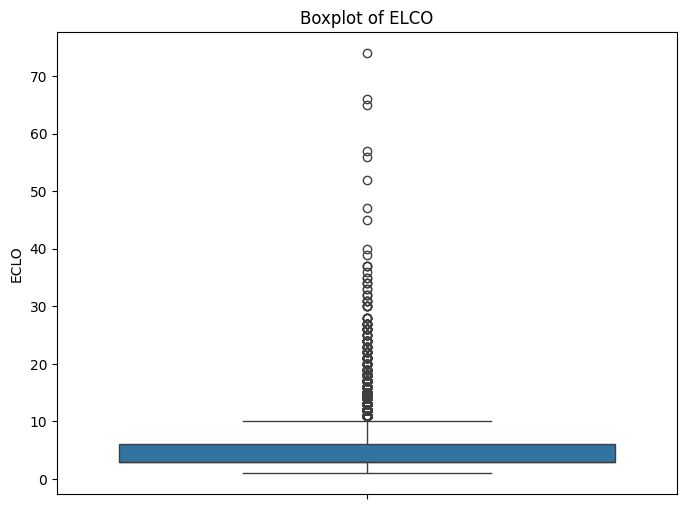

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_region, y='ECLO')
plt.title('Boxplot of ELCO')
plt.show();

In [ ]:
# 이상치 찾기: IQR 방식 사용
Q1 = train_region['ECLO'].quantile(0.25)
Q3 = train_region['ECLO'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 데이터
outliers = train_region[(train_region['ECLO'] < lower_bound) | (train_region['ECLO'] > upper_bound)]
# 이상치 비율 계산
outlier_ratio = len(outliers) / len(train_region) * 100
print(f"이상치 비율: {outlier_ratio:.2f}%")

이상치 비율: 5.36%


In [ ]:
# 이상치 찾기: IQR 방식 사용, 기준 2.5 IQR
Q1 = train_region['ECLO'].quantile(0.25)
Q3 = train_region['ECLO'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

# 이상치 데이터
outliers = train_region[(train_region['ECLO'] < lower_bound) | (train_region['ECLO'] > upper_bound)]
# 이상치 비율 계산
outlier_ratio = len(outliers) / len(train_region) * 100
print(f"이상치 비율: {outlier_ratio:.2f}%")

이상치 비율: 2.34%


In [ ]:
train_eclo = copy.deepcopy(train_region)
train_eclo.head()

,ID,요일,기상상태,노면상태,사고유형,ECLO,연,월,일,시간,...,동,시_구_동,군집분석_1,sin_hour,cos_hour,sin_date,cos_date,sin_month,cos_month,season
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,5,2019,1,1,0,...,대신동,대구광역시중구대신동,7,0.000000,1.000000,-0.514555,-0.514555,-0.5,-0.866025,3
1,ACCIDENT_00001,화요일,맑지 않음,건조,차대사람,3,2019,1,1,0,...,감삼동,대구광역시달서구감삼동,3,0.000000,1.000000,-0.514555,-0.514555,-0.5,-0.866025,3
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,3,2019,1,1,1,...,두산동,대구광역시수성구두산동,3,0.269797,0.962917,-0.514555,-0.514555,-0.5,-0.866025,3
3,ACCIDENT_00003,화요일,맑음,건조,차대차,5,2019,1,1,2,...,복현동,대구광역시북구복현동,3,0.519584,0.854419,-0.514555,-0.514555,-0.5,-0.866025,3
4,ACCIDENT_00004,화요일,맑음,건조,차대차,3,2019,1,1,4,...,신암동,대구광역시동구신암동,3,0.887885,0.460065,-0.514555,-0.514555,-0.5,-0.866025,3


In [ ]:
#치환
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

# 이상치 치환: 범위를 초과하는 값은 최솟값 또는 최댓값으로 치환
train_eclo['ECLO'] = train_eclo['ECLO'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# 치환 후 이상치 비율 계산
outliers_ECLO = train_eclo[(train_region['ECLO'] < lower_bound) | (train_eclo['ECLO'] > upper_bound)]
outlier_ratio_ECLO = len(outliers_ECLO) / len(train_eclo) * 100
print(f"치환 후 이상치 비율: {outlier_ratio_ECLO:.2f}%")

치환 후 이상치 비율: 0.00%


In [ ]:
train_id_drop = train_eclo.drop(columns=['ID']).copy()
test_id_drop = test_region.drop(columns=['ID']).copy()
print(train_id_drop.head())
print('\n\n')
print(test_id_drop.head())

    요일   기상상태 노면상태  사고유형  ECLO     연  월  일  시간 도로형태1  ...    동        시_구_동  \
0  화요일     맑음   건조  차대사람   5.0  2019  1  1   0   단일로  ...  대신동   대구광역시중구대신동   
1  화요일  맑지 않음   건조  차대사람   3.0  2019  1  1   0   단일로  ...  감삼동  대구광역시달서구감삼동   
2  화요일     맑음   건조  차대사람   3.0  2019  1  1   1   단일로  ...  두산동  대구광역시수성구두산동   
3  화요일     맑음   건조   차대차   5.0  2019  1  1   2   단일로  ...  복현동   대구광역시북구복현동   
4  화요일     맑음   건조   차대차   3.0  2019  1  1   4   단일로  ...  신암동   대구광역시동구신암동   

  군집분석_1  sin_hour  cos_hour  sin_date  cos_date  sin_month  cos_month  season  
0      7  0.000000  1.000000 -0.514555 -0.514555       -0.5  -0.866025       3  
1      3  0.000000  1.000000 -0.514555 -0.514555       -0.5  -0.866025       3  
2      3  0.269797  0.962917 -0.514555 -0.514555       -0.5  -0.866025       3  
3      3  0.519584  0.854419 -0.514555 -0.514555       -0.5  -0.866025       3  
4      3  0.887885  0.460065 -0.514555 -0.514555       -0.5  -0.866025       3  

[5 rows x 23 columns]



    요일 기상상태 노

In [ ]:
categorical_features = train_id_drop.select_dtypes(include=['object', 'category']).columns.tolist()
print("범주형 변수:", categorical_features)

범주형 변수: ['요일', '기상상태', '노면상태', '사고유형', '도로형태1', '도로형태2', '시', '구', '동', '시_구_동', 'season']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd



for i in categorical_features:
    # OneHotEncoder 초기화
    le = OneHotEncoder(drop='first', sparse_output=False)

    # train_id_drop 컬럼 변환
    transformed_train = le.fit_transform(train_id_drop[[i]])  # Numpy 배열로 변환
    train_encoded_df = pd.DataFrame(transformed_train, columns=le.get_feature_names_out([i]), index=train_id_drop.index)
    train_id_drop = train_id_drop.drop(columns=[i])  # 기존 컬럼 제거
    train_id_drop = pd.concat([train_id_drop, train_encoded_df], axis=1)  # 변환된 데이터 병합

    # test_id_drop 컬럼 변환
    transformed_test = le.transform(test_id_drop[[i]])  # Numpy 배열로 변환
    test_encoded_df = pd.DataFrame(transformed_test, columns=le.get_feature_names_out([i]), index=test_id_drop.index)
    test_id_drop = test_id_drop.drop(columns=[i])  # 기존 컬럼 제거
    test_id_drop = pd.concat([test_id_drop, test_encoded_df], axis=1)  # 변환된 데이터 병합

In [ ]:
encoded_train_data = copy.deepcopy(train_id_drop)
encoded_test_data = copy.deepcopy(test_id_drop)

In [ ]:
encoded_train_data.head()

,ECLO,연,월,일,시간,군집분석_1,sin_hour,cos_hour,sin_date,cos_date,...,시_구_동_대구광역시중구태평로1가,시_구_동_대구광역시중구태평로2가,시_구_동_대구광역시중구태평로3가,시_구_동_대구광역시중구포정동,시_구_동_대구광역시중구하서동,시_구_동_대구광역시중구향촌동,시_구_동_대구광역시중구화전동,season_1,season_2,season_3
0,5.0,2019,1,1,0,7,0.000000,1.000000,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,2019,1,1,0,3,0.000000,1.000000,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,2019,1,1,1,3,0.269797,0.962917,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,2019,1,1,2,3,0.519584,0.854419,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,2019,1,1,4,3,0.887885,0.460065,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
encoded_test_data.head()

,ECLO,연,월,일,시간,군집분석_1,sin_hour,cos_hour,sin_date,cos_date,...,시_구_동_대구광역시중구태평로1가,시_구_동_대구광역시중구태평로2가,시_구_동_대구광역시중구태평로3가,시_구_동_대구광역시중구포정동,시_구_동_대구광역시중구하서동,시_구_동_대구광역시중구향촌동,시_구_동_대구광역시중구화전동,season_1,season_2,season_3
0,0,2022,1,1,1,7,0.269797,0.962917,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,2022,1,1,1,3,0.269797,0.962917,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2022,1,1,4,6,0.887885,0.460065,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,2022,1,1,4,3,0.887885,0.460065,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,2022,1,1,6,3,0.997669,-0.068242,-0.514555,-0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_train = encoded_train_data.drop(columns=['연']).copy()
final_test = encoded_test_data.drop(columns=['연']).copy()

In [ ]:
len(final_train)

39609

In [ ]:
final_train.head()

,ECLO,월,일,시간,군집분석_1,sin_hour,cos_hour,sin_date,cos_date,sin_month,...,시_구_동_대구광역시중구태평로1가,시_구_동_대구광역시중구태평로2가,시_구_동_대구광역시중구태평로3가,시_구_동_대구광역시중구포정동,시_구_동_대구광역시중구하서동,시_구_동_대구광역시중구향촌동,시_구_동_대구광역시중구화전동,season_1,season_2,season_3
0,5.0,1,1,0,7,0.000000,1.000000,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,1,1,0,3,0.000000,1.000000,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,1,1,1,3,0.269797,0.962917,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,1,1,2,3,0.519584,0.854419,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,1,1,4,3,0.887885,0.460065,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_test.head()

,ECLO,월,일,시간,군집분석_1,sin_hour,cos_hour,sin_date,cos_date,sin_month,...,시_구_동_대구광역시중구태평로1가,시_구_동_대구광역시중구태평로2가,시_구_동_대구광역시중구태평로3가,시_구_동_대구광역시중구포정동,시_구_동_대구광역시중구하서동,시_구_동_대구광역시중구향촌동,시_구_동_대구광역시중구화전동,season_1,season_2,season_3
0,0,1,1,1,7,0.269797,0.962917,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1,1,3,0.269797,0.962917,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,1,4,6,0.887885,0.460065,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1,1,4,3,0.887885,0.460065,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,1,6,3,0.997669,-0.068242,-0.514555,-0.514555,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Columns: 429 entries, ECLO to season_3
dtypes: float64(425), int32(1), int64(3)
memory usage: 129.5 MB


In [ ]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Columns: 429 entries, ECLO to season_3
dtypes: float64(424), int32(1), int64(4)
memory usage: 35.8 MB


In [ ]:
final_train['ECLO'] = final_train['ECLO'].astype('int64')
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Columns: 429 entries, ECLO to season_3
dtypes: float64(424), int32(1), int64(4)
memory usage: 129.5 MB


In [ ]:
# 훈련 데이터에서 'ECLO' 열을 기준으로 train_x와 train_y 분리
train_x = final_train.drop(columns=['ECLO'])
train_y = final_train['ECLO']

# 테스트 데이터에서 'ECLO' 열을 기준으로 test_x와 test_y 분리
test_x = final_test.drop(columns=['ECLO'])
test_y = final_test['ECLO']

In [ ]:
print(f'train 길이: {len(train_x.columns)}')
print(f'test 길이: {len(test_x.columns)}')

train 길이: 428
test 길이: 428


In [ ]:
# optuna는 베이지안 최적화 기반 하이퍼파라미터 튜닝 라이브러리이다
!pip install optuna
!pip install catboost


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import optuna


In [ ]:
# RMSLE 계산 함수
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))



In [ ]:



X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Optuna 목적 함수
def objective(trial):
    # 하이퍼파라미터 검색 공간
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 3, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "border_count": trial.suggest_int("border_count", 32, 256),
        "random_strength": trial.suggest_float("random_strength", 0.1, 1),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "verbose": 0,
        "loss_function": "RMSE",
        "eval_metric": "RMSE",
    }

    # CatBoost 모델 학습
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=0)

    # 검증 데이터에서 예측

    preds = model.predict(X_valid)
    preds = np.maximum(preds, 0)  # 로그 값 계산 오류 방지를 위해 음수값 제거
    score = rmsle(y_valid, preds)

    return score



# Optuna 스터디 생성
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# 최적 하이퍼파라미터로 모델 학습
best_params = study.best_params
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=0)




[I 2024-11-21 13:16:16,373] A new study created in memory with name: no-name-5156eb8b-6a5f-4775-958d-09c526093c6f
[I 2024-11-21 13:16:19,048] Trial 0 finished with value: 0.4411634208404594 and parameters: {'iterations': 480, 'learning_rate': 0.23126332447228973, 'depth': 7, 'l2_leaf_reg': 8.243042789842407, 'border_count': 171, 'random_strength': 0.42363767762108706, 'bagging_temperature': 0.5430206497354367}. Best is trial 0 with value: 0.4411634208404594.
[I 2024-11-21 13:16:24,236] Trial 1 finished with value: 0.44133654129709354 and parameters: {'iterations': 312, 'learning_rate': 0.044025629219714695, 'depth': 3, 'l2_leaf_reg': 2.002183945750654, 'border_count': 120, 'random_strength': 0.8247844075228091, 'bagging_temperature': 0.7390857869919645}. Best is trial 0 with value: 0.4411634208404594.
[I 2024-11-21 13:16:29,649] Trial 2 finished with value: 0.4409609930768083 and parameters: {'iterations': 136, 'learning_rate': 0.19947640024745897, 'depth': 6, 'l2_leaf_reg': 8.66685081

In [ ]:
# 테스트 데이터 예측
test_preds = best_model.predict(test_x)



In [ ]:
submission['ECLO'] = test_preds
submission

,ID,ECLO
0,ACCIDENT_39609,4.399485
1,ACCIDENT_39610,3.783982
2,ACCIDENT_39611,5.503331
3,ACCIDENT_39612,5.211679
4,ACCIDENT_39613,5.016275
...,...,...
10958,ACCIDENT_50567,4.395452
10959,ACCIDENT_50568,4.433814
10960,ACCIDENT_50569,4.776252
10961,ACCIDENT_50570,4.764456


In [ ]:
submission.to_csv('대구교통사고_final.csv', index=False)